In this notebook, I will analyse a dataset to see how data analysis can help us to get insights from the data. I selected one of the famous opened datasets in the internet which is Airbnb dataset. I will use [Boston Airbnb](https://www.kaggle.com/airbnb/boston/) and [Seattle Airbnb](https://www.kaggle.com/airbnb/seattle/data) datasets. 

Here, I will try to answer four questions which are:
- What is most common property type for rent in each state?
- What aspects correlate well to the listing review scores rating?
- What is the average home rental price in Seattle and Boston? and in which seasons do the prices spike?
- How can I predict the listings prices in Boston and Seattle?  

In order to answer the questions, I will follow the CRISP-DM process which are: Business understanding, Data understanding, Data preparation, Modeling, Evaluation, Deployment.


*I will not apply the last step.* 

## Data Understanding

The goal of this step is to understand what you want to accomplish from a business perspective and to set the project objectives.  

The project objectives are:
- Identifying  the most presented property type for rent in each state.
- Finding the relations between the listing review score and the other features in the dataset.
- Identifying  the average of the home renting prices in Seattle and Boston and knowing in which seasons the prices spike.
- Predicting the listings prices in Boston and Seattle.

In [216]:
# Import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

## Data Understanding

This step includes data loading and data exploration. 

In [217]:
# Read the head of Boston Airbnb listing data 
df_boston = pd.read_csv('./boston-airbnb/listings.csv')
df_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [218]:
# Read the head of Seattle Airbnb listing data 
df_seattle = pd.read_csv('./seattle-airbnb/listings.csv')
df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [219]:
# The size of Boston dataset 
df_boston.shape

(3585, 95)

In [220]:
# The size of Seattle dataset 
df_seattle.shape

(3818, 92)

We can notice that the number of coulmns are different, so, I would like to explore the coulmns of each dataset and then delete the differnet columns in Boston dataset.

In [221]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [222]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [223]:
# Read the head of Boston Airbnb calendar data 
df_boston_cal = pd.read_csv('./boston-airbnb/calendar.csv')
df_boston_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [224]:
# Read the head of Seattle Airbnb calendar data 
df_seattle_cal = pd.read_csv('./seattle-airbnb/calendar.csv')
df_seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [225]:
df_boston_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [226]:
df_boston_cal.shape

(1308890, 4)

In [227]:
df_seattle_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [228]:
df_seattle_cal.shape

(1393570, 4)

## Data Preperation

This step inludes data selection and data cleaning. I will remove some columns that I think they are not important in the project. I will also do some necessary data preparation as:

- Deleting the different coulmns in Boston dataset. 
- Exploring the missing values in each column, and finding the columns that have no missing values and the cloumns that have more than 50% missing values.
- Converting the price coulmns from object to float.
- Converting the date coulmns from object to datetime.

*Some of the preperation steps will be done when answering the questions.* 

In [229]:
# Find the different columns

boston_columns = df_boston.columns
seattle_columns = df_seattle.columns

differ_col = []
print('The differnt columns are:')
 
for col in boston_columns:
    if col not in seattle_columns:
        differ_col.append(col)

for col in seattle_columns:
    if col not in boston_columns:
        differ_col.append(col)
        
print(differ_col)        
        

The differnt columns are:
['access', 'interaction', 'house_rules']


In [230]:
# Delete the differnt coulumns from Boston dataset
df_boston = df_boston.drop(differ_col, axis = 1)

In [231]:
df_boston.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [232]:
df_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [233]:
# Find the columns that have no missing values in Boston listing dataset
df_boston.columns[df_boston.isnull().sum() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculat

In [234]:
# Find the columns that have no missing values in Seattle listing dataset
df_seattle.columns[df_seattle.isnull().sum() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

**Note:** I can see that the columns that do not have missing values are almost same in the two datasets. 

In [235]:
# Find cloumns that have more than 50% missing values in Boston listing dataset
df_boston.columns[df_boston.isnull().sum() > df_boston.shape[0] * 0.5]

Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [236]:
# Find cloumns that have more than 50% missing values in Seattle listing dataset
df_seattle.columns[df_seattle.isnull().sum() > df_seattle.shape[0] * 0.5]

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

**Note:** 
The Boston dataset has nine columns that have 50% missing values whearas Seattle dataset has four columns that have 50% missing values. I will delete all the nine columns from the two dataset. 


In [237]:
# Delete cloumns that have more than 50% missing values in Boston and Seattle listing datases
drop_col = df_boston.columns[df_boston.isnull().sum() > df_boston.shape[0] * 0.5]
df_boston = df_boston.drop(drop_col, axis=1)
df_seattle = df_seattle.drop(drop_col, axis=1)

In [238]:
# Convert price to float

def convert_price_to_float(df, col):
    
    '''
    This function converts the price column from to float dtype
    
    INPUT:
    df - a dataframe
    col - a price coulmn

    '''
    # Remove the $ from the price and then converting it to float
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
     
    

In [239]:
convert_price_to_float(df_boston, 'price')
convert_price_to_float(df_seattle, 'price')
convert_price_to_float(df_boston_cal, 'price')
convert_price_to_float(df_seattle_cal, 'price')

In [240]:
# Convert date columns to datetime dtype for easy analysis.

def convert_to_date(col):
    '''
    This function converts the date column from object dtype to datetime dtype
    
    INPUT:
    col - a dataframe column which has object dtype 
    
    OUTPUT:
    col - a dataframe column which has datetime dtype
    '''
    col = pd.to_datetime(col)
    return col

In [241]:
# Convert to datetime dtype

df_boston['last_scraped'] = convert_to_date(df_boston['last_scraped'])
df_seattle['last_scraped'] = convert_to_date(df_seattle['last_scraped'])

df_boston['host_since'] = convert_to_date(df_boston['host_since'])
df_seattle['host_since'] = convert_to_date(df_seattle['host_since'])

df_boston['last_review'] = convert_to_date(df_boston['last_review'])
df_seattle['last_review'] = convert_to_date(df_seattle['last_review'])

df_boston['first_review'] = convert_to_date(df_boston['first_review'])
df_seattle['first_review'] = convert_to_date(df_seattle['first_review'])

df_boston_cal['date'] = convert_to_date(df_boston_cal['date'])
df_seattle_cal['date'] = convert_to_date(df_seattle_cal['date'])

In [242]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 83 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null datetime64[ns]
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
transit                             2295 non-null object
thumbnail_url                       2986 non-null object
medium_url                          2986 non-null object
picture_url                         3585 non-null object
xl_picture_url                      2986 non-null object
host_id                         

In [243]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 83 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null datetime64[ns]
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id                         

In [244]:
df_boston_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


In [245]:
df_seattle_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


## Modeling

The goal of this step is to build a model to answer the questions. In the first three, I do not need to use a machine learning model so, I will use some statistical techniques with visualization to answer the question. For answering the last question, I will use a machine learning model.



### Question 1: What is the most common property type for rent in each state?

To answer this question, I will use viualization. 

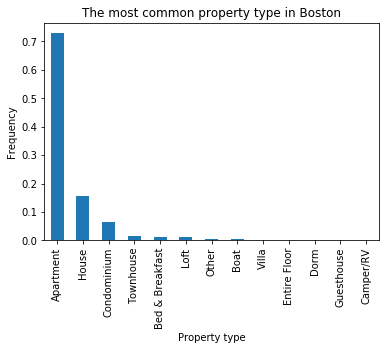

In [246]:
# Show the most rented property type in Boston
prop_typ_val = pd.Series(df_boston['property_type'].value_counts())
(prop_typ_val/df_boston.shape[0]).plot(kind = 'bar');
plt.title('The most common property type in Boston')
plt.xlabel('Property type')
plt.ylabel('Frequency')

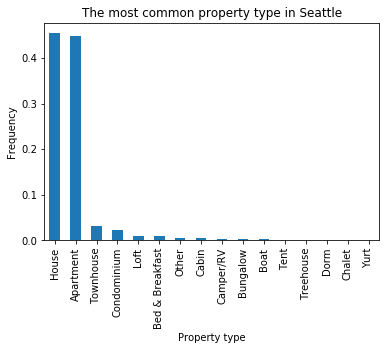

In [247]:
# Show the most rented property type in Seattle
prop_typ_val = pd.Series(df_seattle['property_type'].value_counts())
(prop_typ_val/df_seattle.shape[0]).plot(kind = 'bar');
plt.title('The most common property type in Seattle')
plt.xlabel('Property type')
plt.ylabel('Frequency')

**The answer:**

As we can see, there are different type of property in Seattle and Boston. The most presented property type in Boston is "Apartment", more than 70% of the presented property in Boston is "Apartment". The second most presented property type in Boston is "House" property type comes at the second. As for Seattle, The most presented property type in it is "House", arround 45% of the presented property types are "House" and also arround 45% of them are "Apartment".

### Question 2: What aspects correlate well to the listing review scores rating? and what is the average of the review scores in Boston and Seattle?

To answer this question,firstly, I will do some data preperation, I will check the null values in review_scores_rating column and delete them. Then, I will try to find the relation between the review scores and bed type, room type and price. After that, I will  claculate the average of the review scores in Boston and Seattle.

In [248]:
# Calculate the number and proportion of missing values of the review scores in Boston dataset
null_review_boston = df_boston['review_scores_rating'].isnull().sum()
print(null_review_boston)
print(null_review_boston/df_boston.shape[0])

813
0.22677824267782426


In [249]:
# Delete the missing values of the review scores in Boston dataset
df_boston = df_boston.dropna(subset=['review_scores_rating'])

In [250]:
# Calculating the number and proportion of missing values of the review scores in Seattle dataset
null_review_seattle = df_seattle['review_scores_rating'].isnull().sum()
print(null_review_seattle)
print(null_review_seattle/df_seattle.shape[0])

647
0.16946045049764275


In [251]:
# Delete the missing values of the review scores in Boston dataset
df_seattle = df_seattle.dropna(subset=['review_scores_rating'])

In [252]:
df_boston.groupby(['room_type']).mean()['review_scores_rating']

room_type
Entire home/apt    92.331505
Private room       91.338590
Shared room        90.830189
Name: review_scores_rating, dtype: float64

In [253]:
df_seattle.groupby(['room_type']).mean()['review_scores_rating']

room_type
Entire home/apt    94.477647
Private room       94.802935
Shared room        93.228261
Name: review_scores_rating, dtype: float64

**Note:** I could not say there is a relation between the review scores and the room type. As you can see, there is less than a 2% difference between the average of the review scores in the two states.

In [254]:
df_boston.groupby(['bed_type']).mean()['review_scores_rating']

bed_type
Airbed           92.103448
Couch            87.333333
Futon            91.583333
Pull-out Sofa    91.740741
Real Bed         91.932757
Name: review_scores_rating, dtype: float64

In [255]:
df_seattle.groupby(['bed_type']).mean()['review_scores_rating']

bed_type
Airbed           93.944444
Couch            95.375000
Futon            94.301587
Pull-out Sofa    94.820513
Real Bed         94.541899
Name: review_scores_rating, dtype: float64

**Note:** The listings with couch bed type in Boston has lower review scores. 

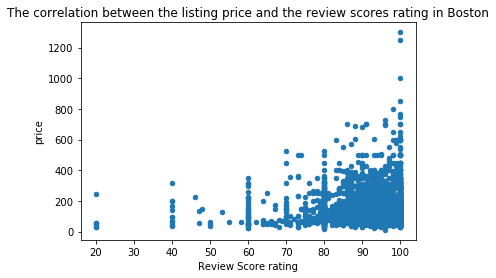

In [256]:
df_boston.plot.scatter(x ='review_scores_rating', y ='price')
plt.title('The correlation between the listing price and the review scores rating in Boston')
plt.xlabel("Review Score rating")
plt.ylabel("price")
plt.show()

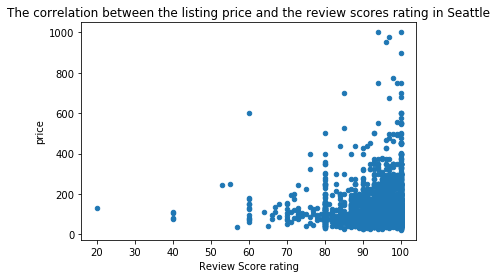

In [257]:
df_seattle.plot.scatter(x ='review_scores_rating', y ='price')
plt.title('The correlation between the listing price and the review scores rating in Seattle')
plt.xlabel("Review Score rating")
plt.ylabel("price")
plt.show()

**Note:** I have noticed the following:

- In Boston, the listings with reviews scores ratings less than 50%, its prices are less than \$400, and the listings with prices greater than \$800 have reviews scores of 100%. 
- In Seattle, the listings with prices greater than \$800 have review scores greater than 92%. 

This is because the expensive listings often offer excellent services and this makes customers give these listings high reviews scores. 

In [258]:
df_boston['review_scores_rating'].mean()

91.91666666666667

In [259]:
df_seattle['review_scores_rating'].mean()

94.53926206244087

**The answer:**

There is a correlation between the listings prices and the reviews scores ratings. 
The average of review scores rating in Seattle (94.5%) is greater than the average of review scores rating in Boston (91.9%).


### Question 3: What is the average home rental price in Seattle and Boston? and in which seasons do the prices spike?

To answer this question, firstly, I will calculate the mean of the prices, then, I will use viualization to see if there is a spike in price in a season. I will use listing and calendar datasets.

In [260]:
print('The average of home renting prices in Boston is ${}'.format(round(df_boston['price'].mean(),2)))

The average of home renting prices in Boston is $166.68


In [261]:
print('The average of home renting prices in Seattle is ${}'.format(round(df_seattle['price'].mean(),2)))

The average of home renting prices in Seattle is $126.8


In [262]:
df_boston_price = df_boston[['price']]
df_seattle_price = df_seattle[['price']]

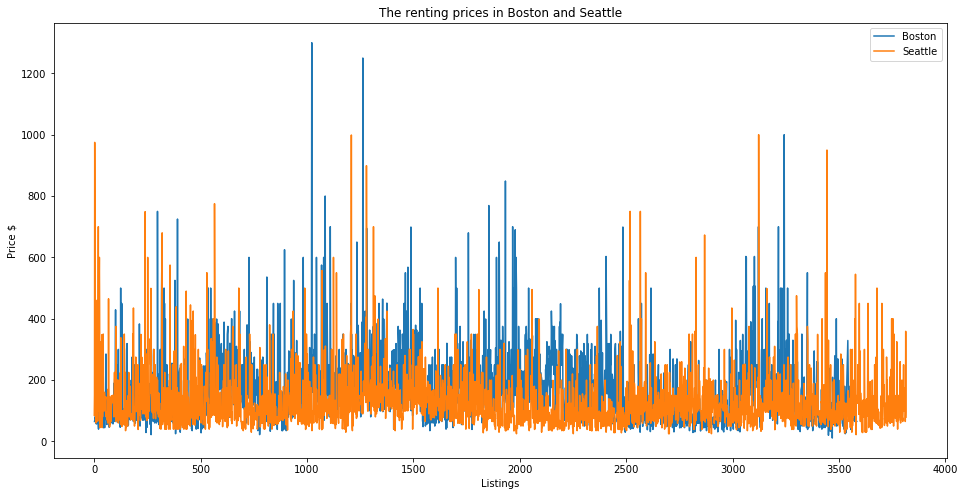

In [263]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(df_boston_price, label = 'Boston')
ax.plot(df_seattle_price, label = 'Seattle')
ax.legend()
plt.title('The renting prices in Boston and Seattle')
plt.xlabel('Listings')
plt.ylabel('Price $')


**Note:** As you can see, in general, the prices of the home renting in Boston is higher than the prices of the home renting in Seattle. 

To investigate in which seasons the prices spike, I will use the calender dataset. I have noticed that the range of the date in the Boston dataset is from Sep 2016 to Sep 2017, and the range of the date in the Seattle dataset is from Jan 2016 to Jan 2017. So, I will use day of year instead of date. 

In [264]:
# Use the day of year and then group the table by day of year. 
 
df_boston_cal['doy'] = df_boston_cal['date'].dt.dayofyear.astype(int)
year_boston_price = df_boston_cal.groupby(['doy']).mean()
year_boston_price = year_boston_price.drop(['listing_id'], axis = 1)

df_seattle_cal['doy'] = df_seattle_cal['date'].dt.dayofyear.astype(int)
year_seattle_price = df_seattle_cal.groupby(['date']).mean()
year_seattle_price = year_seattle_price.drop(['listing_id'], axis = 1)

In [265]:
# Reset index
year_boston_price = year_boston_price.reset_index()
year_seattle_price = year_seattle_price.reset_index()

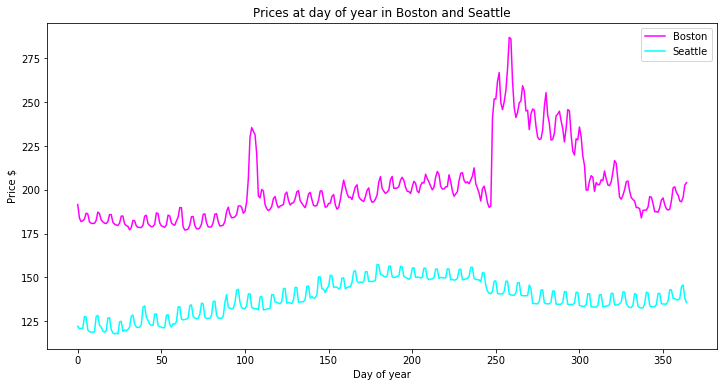

In [266]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(year_boston_price['price'], label = 'Boston', color = 'magenta')
ax.plot(year_seattle_price['price'], label = 'Seattle', color = 'cyan')
ax.legend()
plt.title('Prices at day of year in Boston and Seattle')
plt.xlabel('Day of year')
plt.ylabel('Price $')

**The answer:** 

The average home rental prices in Boston is \$166.68, while the average in Seattle is \$126.8.  

In Boston, the prices spike in September and May, and in general, the prices in September, October, November are higher than the other months of the year. In Seattle, the prices increase in June and start to decrease in September.

### Question 4: How can I predict the price listings prices in Boston and Seattle? 

The goal of this question is to build a model for prices prediction using LinearRegression model. I will use LinearRegression model because it is used to measure the relationship between predictor variables and response variable which is a continuous variable. Before creating the model, I need to some data preperation techinques. In this part, I will do the following:

- Select some features that I think they are related to the price.
- Change the amenities column from a multi value column to single value columns.
- Change categorical column to dummy categorical columns.
- Fill the mean of the column for any missing values.
- Create training and test sets of data.
- Instantiate a LinearRegression model with normalized data.
- Fit the model to the training data.
- Calculate the rscore value for both the training and test data.
- Identify the coefficient of the selected features.  

In [267]:
# Insert a list of a variables that I think it affects the price

var = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'amenities', 'price']

# Create a dataframe using the variables
df_boston_model = df_boston[var]
df_seattle_model = df_seattle[var]

In [268]:
df_boston_model.head()

,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,amenities,price
1,Roslindale,Apartment,Private room,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0
2,Roslindale,Apartment,Private room,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0
3,Roslindale,House,Private room,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0
4,Roslindale,House,Private room,1.5,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0
5,Roslindale,Condominium,Private room,1.0,1.0,"{""Cable TV"",""Wireless Internet"",""Air Condition...",75.0


In [269]:
df_seattle_model.head()

,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,amenities,price
0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0
1,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0
2,West Queen Anne,House,Entire home/apt,4.5,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0
4,West Queen Anne,House,Entire home/apt,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0
5,West Queen Anne,House,Private room,1.0,1.0,"{""Wireless Internet"",""Free Parking on Premises...",120.0


In [270]:
# Change the amenities column from a multi value column to single value columns

def preprocess_amenities_col(df):
    '''
    This function converts the amenities column from a multi value column to single value columns that have bool dtype
    
    INPUT:
    df - a dataframe that has amenities column
    
    OUTPUT:
    new_df - a dataframe that has columns of amenities that have bool dtype
    unique_amenities - a list of amenities
    '''
    
    new_df = df
    
    # Remove {, }, " charecters from the amenities column
    repl = ['{', '}', '"']
    for ch in repl:
        new_df['amenities'] = new_df['amenities'].str.replace(ch,'')
        
    # Split the column contents in ',' and put the contents in a list
    amenities_lists = new_df['amenities'].map(lambda val: val.split(",")).values
    
    # Concatenate all lists and select the unique values
    unique_amenities = np.unique(np.concatenate(amenities_lists))
    
    # Put in the amenities coulmn a boolean list of the uinque amenities
    is_amenity = np.array([new_df['amenities'].map(lambda val: item in val) for item in unique_amenities])
    
    # Add columns to the dataframe of uinque amenities that has true, false values 
    new_df = pd.concat([new_df, pd.DataFrame(data=is_amenity.T, columns=unique_amenities)], axis=1)
    
    # Delete amenities column
    new_df = new_df.drop(['amenities'], axis = 1)
    
    # Change the dtype of the uinque amenities columns to bool
    for col in unique_amenities:
        new_df[col] = new_df[col].astype(bool)
    
    return new_df, unique_amenities

In [271]:
# Use preprocess_amenities_col

clean_df_boston_model, amenities_boston = preprocess_amenities_col(df_boston_model)
clean_df_boston_model.head()

C:\Users\missn_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,price,,24-Hour Check-in,Air Conditioning,Breakfast,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,False,...,True,False,False,True,True,False,False,True,False,False
1,Roslindale,Apartment,Private room,1.0,1.0,65.0,True,False,True,False,...,True,False,False,True,True,False,False,True,True,True
2,Roslindale,Apartment,Private room,1.0,1.0,65.0,True,False,True,True,...,True,False,False,True,True,False,False,True,False,False
3,Roslindale,House,Private room,1.0,1.0,75.0,True,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4,Roslindale,House,Private room,1.5,1.0,79.0,True,False,True,False,...,True,False,False,True,False,False,False,True,False,False


In [272]:
clean_df_boston_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3583
Data columns (total 52 columns):
neighbourhood_cleansed                        2772 non-null object
property_type                                 2770 non-null object
room_type                                     2772 non-null object
bathrooms                                     2760 non-null float64
bedrooms                                      2765 non-null float64
price                                         2772 non-null float64
                                              3399 non-null bool
24-Hour Check-in                              3399 non-null bool
Air Conditioning                              3399 non-null bool
Breakfast                                     3399 non-null bool
Buzzer/Wireless Intercom                      3399 non-null bool
Cable TV                                      3399 non-null bool
Carbon Monoxide Detector                      3399 non-null bool
Cat(s)                           

In [273]:
# Use preprocess_amenities_col

clean_df_seattle_model, amenities_seattle = preprocess_amenities_col(df_seattle_model)
clean_df_seattle_model.head()

C:\Users\missn_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,price,,24-Hour Check-in,Air Conditioning,Breakfast,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,85.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,True
1,West Queen Anne,Apartment,Entire home/apt,1.0,1.0,150.0,True,False,False,False,...,True,False,True,False,False,True,True,False,False,True
2,West Queen Anne,House,Entire home/apt,4.5,5.0,975.0,True,False,True,False,...,False,True,True,False,False,True,True,False,False,True
3,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,...,False,True,True,False,False,True,False,False,False,True
4,West Queen Anne,House,Entire home/apt,2.0,3.0,450.0,True,False,False,False,...,False,True,True,False,False,False,False,False,False,True


In [274]:
clean_df_seattle_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 3814
Data columns (total 48 columns):
neighbourhood_cleansed        3171 non-null object
property_type                 3171 non-null object
room_type                     3171 non-null object
bathrooms                     3159 non-null float64
bedrooms                      3165 non-null float64
price                         3171 non-null float64
                              3699 non-null bool
24-Hour Check-in              3699 non-null bool
Air Conditioning              3699 non-null bool
Breakfast                     3699 non-null bool
Buzzer/Wireless Intercom      3699 non-null bool
Cable TV                      3699 non-null bool
Carbon Monoxide Detector      3699 non-null bool
Cat(s)                        3699 non-null bool
Dog(s)                        3699 non-null bool
Doorman                       3699 non-null bool
Dryer                         3699 non-null bool
Elevator in Building          3699 non-null b

In [275]:
# Delete bad columns from the dataframe
clean_df_boston_model = clean_df_boston_model.drop(["", "translation missing: en.hosting_amenity_49", 
                                                    "translation missing: en.hosting_amenity_50"], axis=1)
clean_df_seattle_model = clean_df_seattle_model.drop([""], axis=1)

In [276]:
# Subset to a dataframe only holding the categorical columns

cat_df = clean_df_boston_model.select_dtypes(include=['object'])
cat_cols_lst_boston = cat_df.columns

cat_df = clean_df_seattle_model.select_dtypes(include=['object'])
cat_cols_lst_seattle = cat_df.columns


In [277]:
#Pull a list of the column names of the categorical variables

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df -dataframe with categorical variables 
    cat_cols - list of categorical columns names
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(
                df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], 
                           axis=1)
        except:
            continue
    return df

In [278]:
# Fit a linear model

def fit_linear_model(df, predicted_col, cat_cols, dummy_na, test_size = 0.3, rand_state = 42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    predicted_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    coef - the coefficient list of the dataset coulmns
    
    '''
    # Drop the rows with missing price values
    df  = df.dropna(subset=[predicted_col], axis=0)

    # Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    # Remove predicted column from the dataframe variables
    X = df.drop(predicted_col, axis=1)
    y = df[predicted_col]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    # Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    coef = lm_model.coef_

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, coef


In [279]:
# Use the function with the listing Boston dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, coef_ = fit_linear_model(clean_df_boston_model, 'price', cat_cols_lst_boston, dummy_na = False)

# Print training and testing score
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.6326580630517862.  The rsquared on the test data is 0.60195862526688.


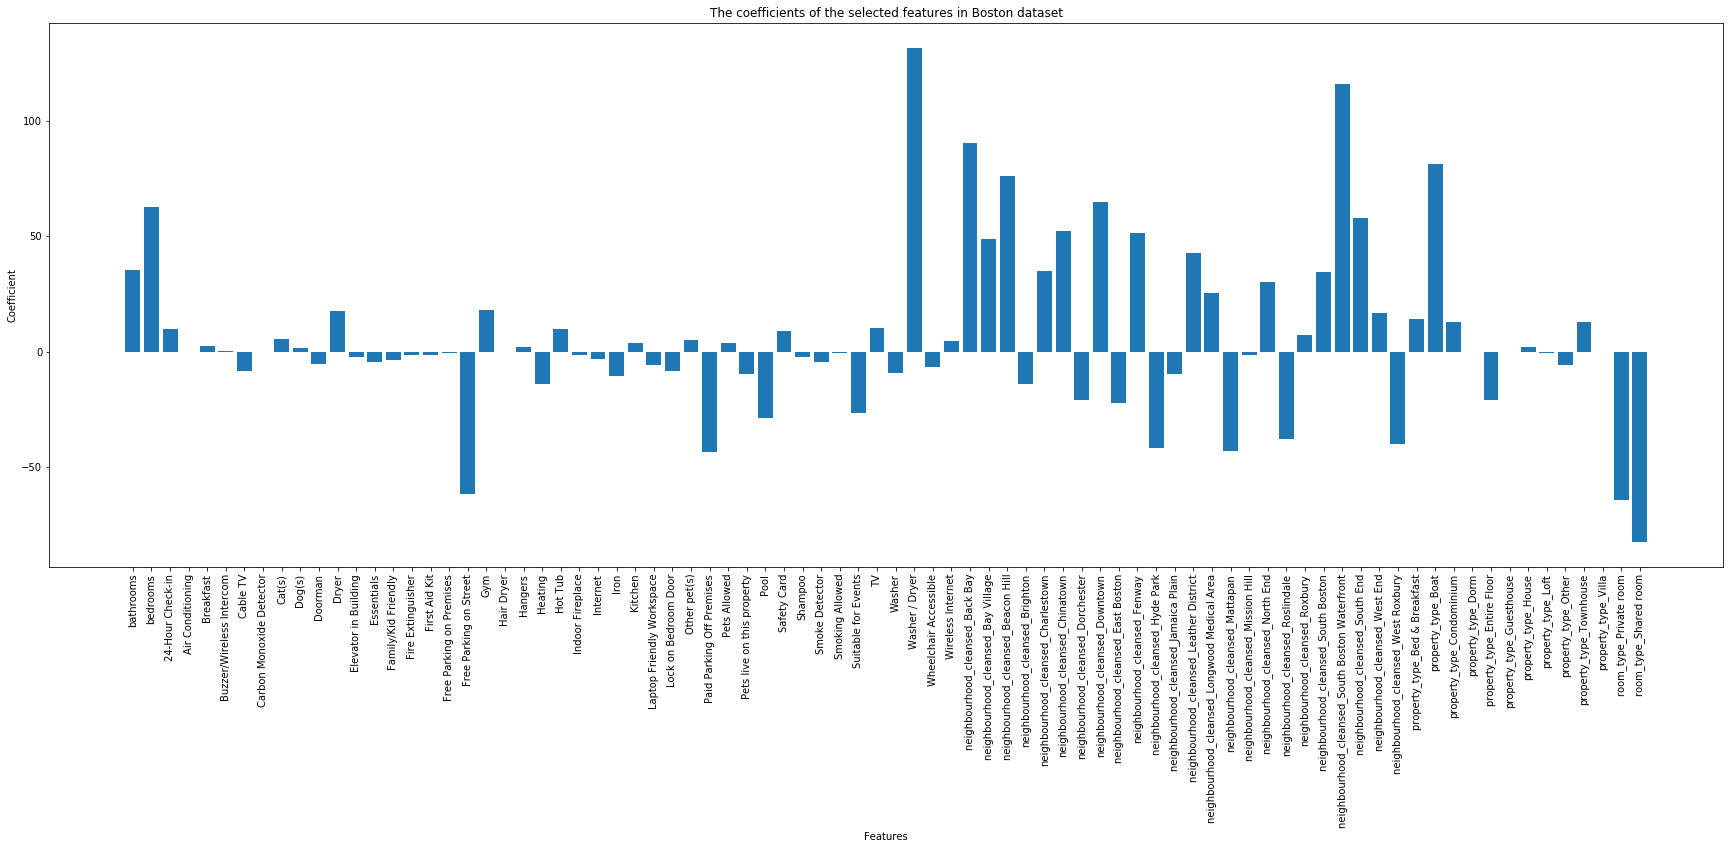

In [280]:
# Show a plot that shows the coefficient of the selected features.

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
cols = np.arange(len(X_train.columns))
plt.xticks(cols, X_train.columns)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(cols, coef_)
plt.title('The coefficients of the selected features in Boston dataset')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show();


In [281]:
# Use the function with the listing Seattle dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, coef_ = fit_linear_model(clean_df_seattle_model, 'price', cat_cols_lst_seattle, dummy_na = False)

# Print training and testing score
print("The rsquared on the training data is {}.  The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.588441932084464.  The rsquared on the test data is 0.5874277270977053.


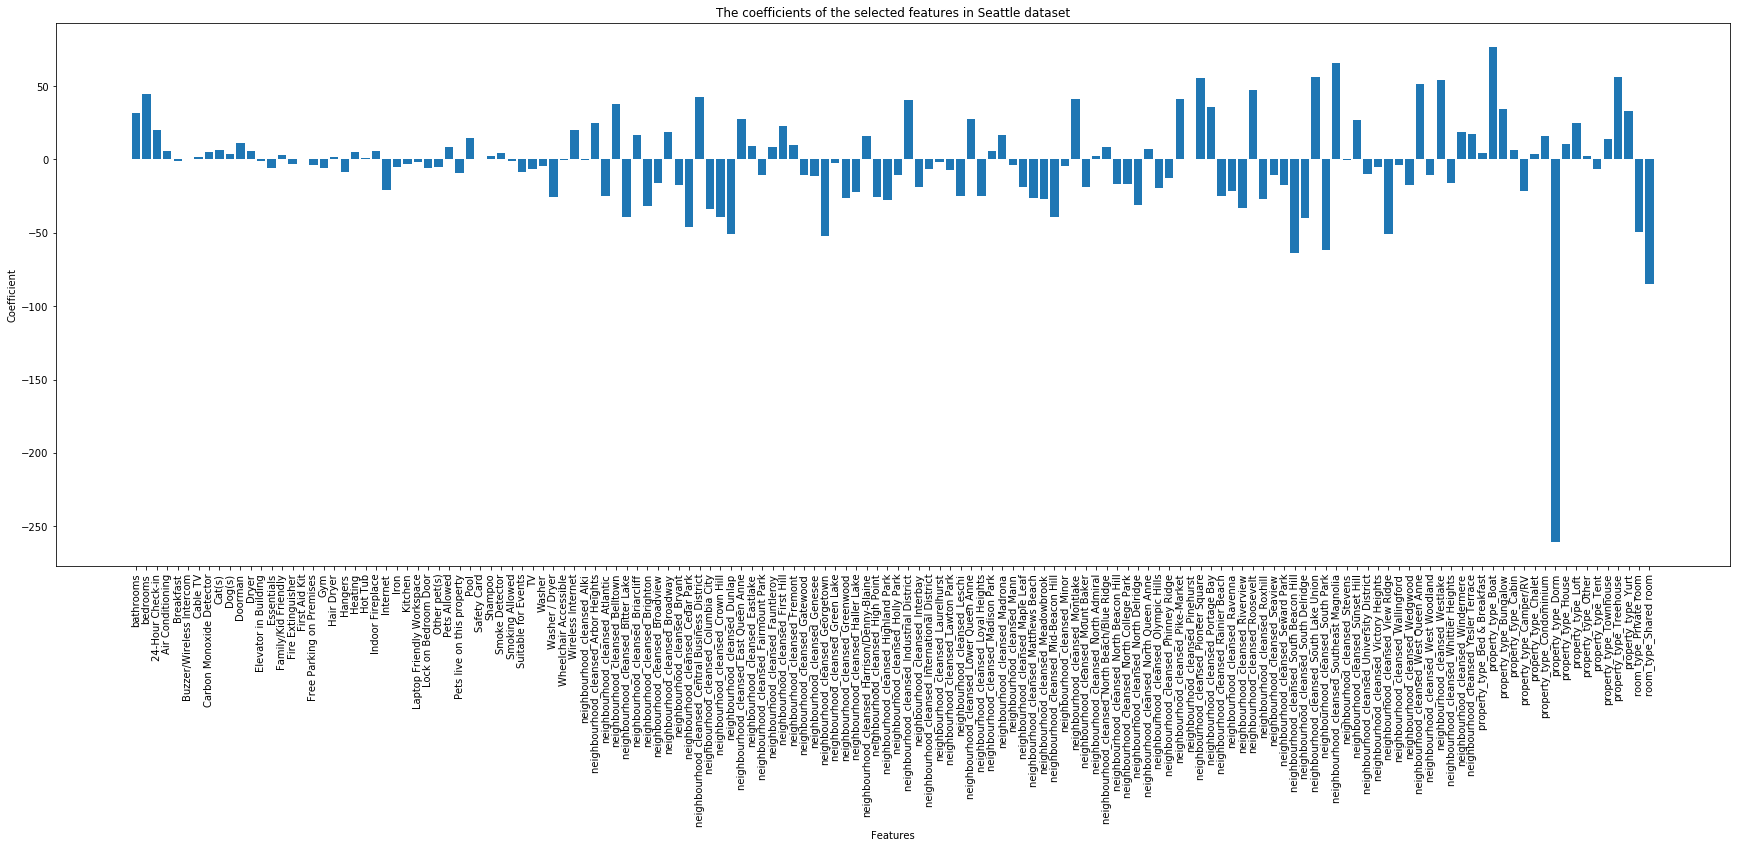

In [282]:
# Show a plot that shows the coefficient of the selected features.

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
cols = np.arange(len(X_train.columns))
plt.xticks(cols, X_train.columns)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(cols, coef_)
plt.title('The coefficients of the selected features in Seattle dataset')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show();

**The answer:**

The r2 score of the prediction model was 60% with Boston dataset, and The r2 score of the prediction model was 58% with Seattle dataset. There is no overfitting in the model, but I think the model needs some improvments to increase the r2 score. 

Based on the coefficient of the features, I have found the following:

- In Boston dataset:
    - The most effective feature was "Washer/ Dryer" and the other amenities have smaller effects such as "TV" and "Gym" or negative effects such as "Pool"
    - Some of the neighborhoods have high effects on the price such as "South Boston Waterfront" and "Back Bay".
    - The number of the bathrooms and bedrooms have effects on the price.
    - The type of the property has very small effect or negative effect on the price. 
    
    
- In Seattle dataset:
    - The most effective feature was "Boat" property type and the other property types have smaller effects such as "Bungalow", "Treehouse" and "yurt" or negative effects such as "Dorm"
    - Some of the neighborhoods have high effects on the price such as "Magnolia" and "South Lake Union".
    - The number of the bathrooms and bedrooms have effects on the price.
    - All amenities have very small effect or negative effect on the price. 
    
    
I can say the bathrooms and bedrooms have effects on the renting price of houses in Seattle and Boston.

## Evaluation

The goal of this step is to check if the model meets the objectives. Also, evaluation helps to ensure the machine learning model is generalized against unseen data. 

I could answer all questions and meets the objectives. 